In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import numpy as np

In [2]:
data_train = pathlib.Path("Data/train")
data_test = pathlib.Path('Data/test')

In [3]:
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_test.glob('*/*.jpg')))
print(image_count_test)

3359
988


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_train,
    seed=123,
    validation_split = 0.4,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 5359 files belonging to 4 classes.
Using 3216 files for training.


In [10]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog', 'giraffe', 'horse']


In [11]:
num_classes = 9 

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs = 10
history = model.fit(
  train_ds,
  epochs=epochs
)

Epoch 1/10
101/101 [==============================] - 196s 2s/step - loss: 1.2721 - accuracy: 0.4198
Epoch 2/10
101/101 [==============================] - 208s 2s/step - loss: 0.8683 - accuracy: 0.6418
Epoch 3/10
101/101 [==============================] - 289s 3s/step - loss: 0.6425 - accuracy: 0.7519
Epoch 4/10
101/101 [==============================] - 291s 3s/step - loss: 0.4326 - accuracy: 0.8364
Epoch 5/10
101/101 [==============================] - 289s 3s/step - loss: 0.2735 - accuracy: 0.8999
Epoch 6/10
101/101 [==============================] - 292s 3s/step - loss: 0.1538 - accuracy: 0.9471
Epoch 7/10
101/101 [==============================] - 293s 3s/step - loss: 0.1126 - accuracy: 0.9627
Epoch 8/10
101/101 [==============================] - 293s 3s/step - loss: 0.0668 - accuracy: 0.9767
Epoch 9/10
101/101 [==============================] - 293s 3s/step - loss: 0.1022 - accuracy: 0.9692
Epoch 10/10
101/101 [==============================] - 291s 3s/step - loss: 0.0558 - accura

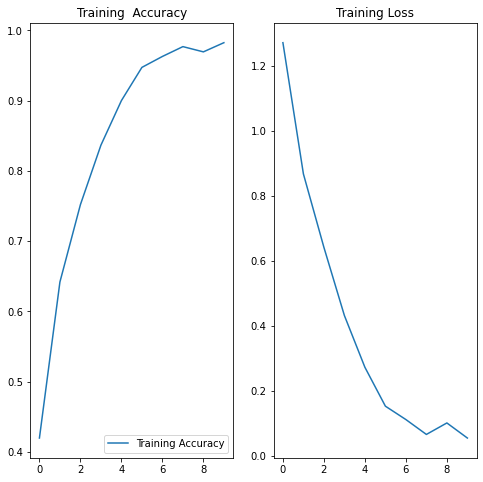

In [14]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training  Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')

plt.title('Training Loss')
plt.show()